## Pyber Data Anaysis
- There's a direct correlation between the total number of rides and driver count: as the total number of rides increased, the driver count also increased. This was evident in the Pyber Ride Sharing Data (2016) graph, below, where along the increasing values of the x-axis ("Total Number of Rides (Per City)"), the plot bubbles also increased in size, indicating that hte driver count also increased.
- As the total number of rides (per city) has a inverse relationship with average fare. The average fare also had an inverse relationship with driver count. 
- Compared to rural and suburban cities, urban cities contribute the largest (by a wide margin) to total rides, total fares, and total drivers.


In [2]:
# Import modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read csv files and create data frame
city_data = os.path.join("Resources","city_data.csv")
ride_data = os.path.join("Resources", "ride_data.csv")

city_data_df = pd.read_csv(city_data)
city_data_df = city_data_df.drop_duplicates(["city"])

ride_data_df = pd.read_csv(ride_data)

In [4]:
# Merge city and ride data dataframes
city_ride_df = pd.merge(ride_data_df, city_data_df, on = "city", how="outer")

# Get unique cities and driver counts
city_data_unique = city_ride_df.loc[:, ["city", "driver_count", "type"]]
city_data_unique = city_data_unique.drop_duplicates(["city"])

# Create df for number of rides per city
num_rides = city_ride_df.groupby(["city"])["ride_id"].count()
num_rides_df = pd.DataFrame({"num_rides": num_rides})
num_rides_df = num_rides_df.reset_index()

# Create df for mean fares per city
mean_fare = city_ride_df.groupby(["city"])["fare"].mean()
mean_fare_df = pd.DataFrame({"mean_fare": mean_fare})
mean_fare_df = mean_fare_df.reset_index()

# Merge the df's together
merged_df = pd.merge(city_data_unique, mean_fare_df, on= "city", how="outer")
merged_df = pd.merge(merged_df, num_rides_df, on= "city", how="outer")

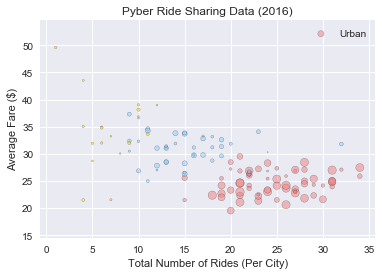

In [10]:
## Create bubble plot
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.ylim(min(merged_df["mean_fare"])-5, max(merged_df["mean_fare"]) + 5)
col_map = merged_df["type"].map({"Urban": "lightcoral", "Suburban": "lightskyblue", "Rural": "gold"})

# Create scatter plot
plt.scatter(merged_df["num_rides"], merged_df["mean_fare"], c= col_map, s=merged_df["driver_count"], alpha = 0.5, edgecolor = "black")
plt.legend(["Urban", "Suburban", "Rural"], loc = "upper right")

sns.set()
plt.show()

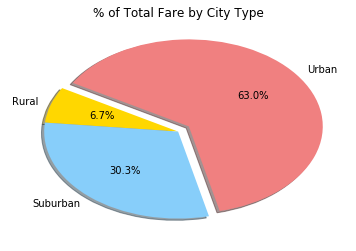

In [6]:
### Pie Chart - % of Total Fares by City Type
total_fares = city_ride_df["fare"].sum()
total_fares_type = city_ride_df.groupby(["type"]).sum()
total_fares_type["pct_total_fare"] = (total_fares_type["fare"]/total_fares) * 100

# create pie chart
col_list = pd.DataFrame({"type": total_fares_type.index.values})
col_map = col_list["type"].map({"Urban": "lightcoral", "Suburban": "lightskyblue", "Rural": "gold"})
explode = [0,0,.1]

plt.pie(total_fares_type["pct_total_fare"], labels=total_fares_type.index, colors=col_map,
        autopct="%1.1f%%", shadow=True, startangle=150, explode = explode)

#print(total_fares_type)
plt.title("% of Total Fare by City Type")
plt.show()

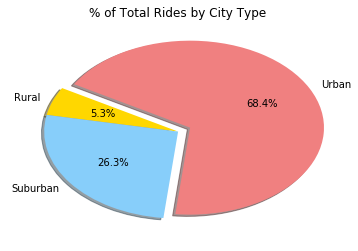

In [7]:
### Pie Chart - % Total Rides by City Type
total_rides = city_ride_df["fare"].count()
total_rides_type = city_ride_df.groupby(["type"]).count()
total_rides_type["pct_total_rides"] = (total_rides_type["fare"]/total_rides) * 100

# create pie chart
col_list = pd.DataFrame({"type": total_rides_type.index.values})
col_map = col_list["type"].map({"Urban": "lightcoral", "Suburban": "lightskyblue", "Rural": "gold"})
plt.pie(total_rides_type["pct_total_rides"], labels=total_rides_type.index, colors=col_map,
        autopct="%1.1f%%", shadow=True, startangle=150, explode = explode)

#print(total_fares_type)
plt.title("% of Total Rides by City Type")
plt.show()

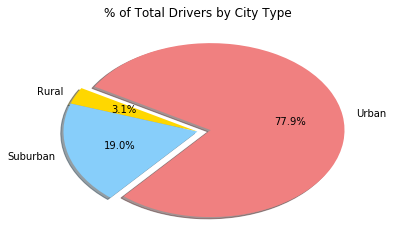

In [8]:
### Pie Chart - % Total Driver by City Type
total_drivers = city_data_df["driver_count"].sum()
total_drivers_type = city_data_df.groupby(["type"]).sum()
total_drivers_type["pct_total_drivers"] = (total_drivers_type["driver_count"]/total_drivers) * 100

# create pie chart
col_list = pd.DataFrame({"type": total_drivers_type.index.values})
col_map = col_list["type"].map({"Urban": "lightcoral", "Suburban": "lightskyblue", "Rural": "gold"})
plt.pie(total_drivers_type["pct_total_drivers"], labels=total_drivers_type.index, colors=col_map,
        autopct="%1.1f%%", shadow=True, startangle=150, explode = explode)

#print(total_fares_type)
plt.title("% of Total Drivers by City Type")
plt.show()